Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


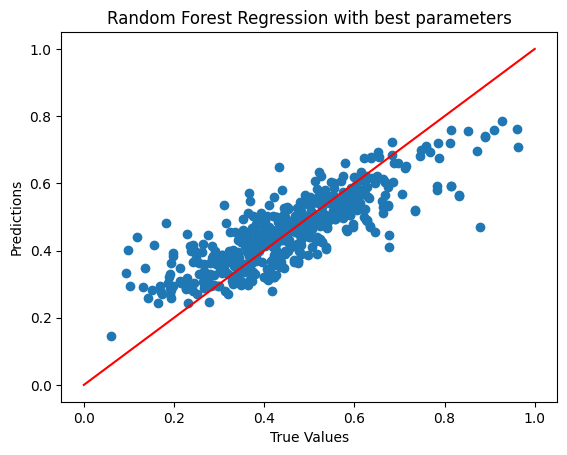

Random Forest Regression Accuracy with best parameters: 65.79% (4.75%)
Random Forest Regression MSE with best parameters: 0.007612554453620233, R2 with best parameters: 0.6761380416280733


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For Scaling
from sklearn.model_selection import train_test_split, KFold, cross_val_score # for Kfold and the cross valiation score
from sklearn.ensemble import RandomForestRegressor # our Model
from sklearn.model_selection import GridSearchCV # GridsearchCV for find best parameter
from sklearn.metrics import mean_squared_error, r2_score # Evaluation metrics for Regression
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/semifinaldata_4.csv')

# One-Hot-Encoding(get_dumies)
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# Prepare Dataset
X = encoded_df[['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

kfold = KFold(n_splits=11, random_state=0, shuffle=True) # Best n_split = 11

# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
# So the best parameter will chosen by GridSearch 

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Reshape y_train
y_train = y_train.ravel()

## Random Forest Regression with best parameters
random_forest_model_best = RandomForestRegressor(**best_params)
random_forest_model_best.fit(X_train, y_train)
y_pred_random_forest_best = random_forest_model_best.predict(X_test)

# Evaluation for model with best parameters
mse_random_forest_best = mean_squared_error(y_test, y_pred_random_forest_best)
r2_random_forest_best = r2_score(y_test, y_pred_random_forest_best)

# Scatter plot for Random Forest Regression with best parameters
plt.scatter(y_test, y_pred_random_forest_best)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression with best parameters")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

# Apply k-Fold Cross Validation for Random Forest with best parameters
results_random_forest_best = cross_val_score(random_forest_model_best, X_train, y_train, cv=kfold)

# Print cross validation score for Random Forest with best parameters
print("Random Forest Regression Accuracy with best parameters: %.2f%% (%.2f%%)" % (results_random_forest_best.mean()*100, results_random_forest_best.std()*100))
print(f"Random Forest Regression MSE with best parameters: {mse_random_forest_best}, R2 with best parameters: {r2_random_forest_best}")




Best K for Random Forest Regression: 11, Accuracy: 64.11%


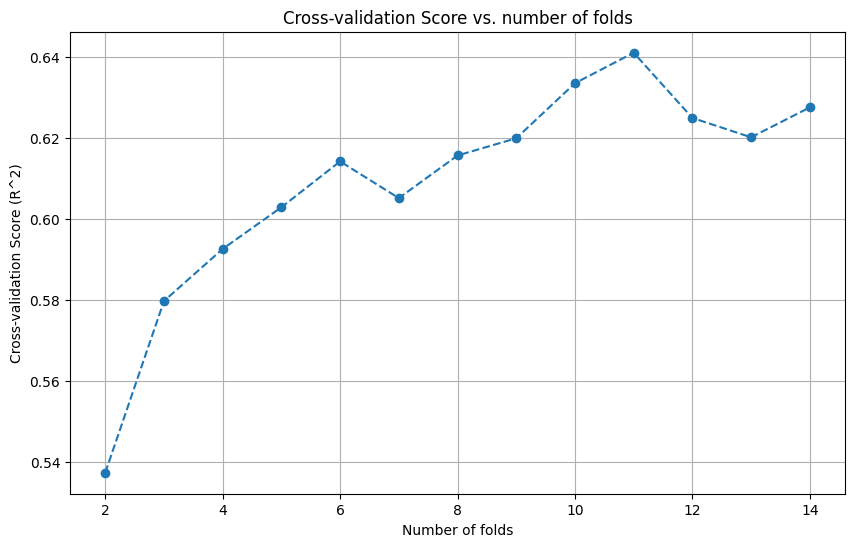

In [4]:
# List to store scores
scores_rf = []

# K values to try
k_values = range(2, 15)

# For each K value...
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    
    # Create a Random Forest Regressor model
    random_forest_model = RandomForestRegressor()
    
    # Apply k-Fold Cross Validation
    result_rf = cross_val_score(random_forest_model, X_train, y_train.ravel(), cv=kfold)
    
    # Record average accuracy
    scores_rf.append(result_rf.mean())

# Print the best K and its score for Random Forest Regression
best_k_rf = k_values[scores_rf.index(max(scores_rf))]
print(f"Best K for Random Forest Regression: {best_k_rf}, Accuracy: {max(scores_rf)*100:.2f}%")

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_rf, marker='o', linestyle='dashed')
plt.title('Cross-validation Score vs. number of folds')
plt.xlabel('Number of folds')
plt.ylabel('Cross-validation Score (R^2)')
plt.grid()
plt.show()

